In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import netCDF4 as nc
file = './SST.nc'
dataset = nc.Dataset(file)
print(dataset.variables.keys())

dict_keys(['longitude', 'latitude', 'time', 'sst'])


In [11]:
'''
longitude 是纬度，共有 360* 4 = 1440 个点, 
latitude 是经度，共有 180*2 + 1 = 361 个点,
time 时间是从1982年1月开始
sst 是361 * 1440 的矩阵
'''
longitude, latitude = dataset.variables['longitude'],dataset.variables['latitude']

time = dataset.variables['time']

sst =dataset.variables['sst']

# sum_1982 = np.zeros(sst[:1].data.shape, dtype=float, order='C')
# for i in range(0, 12):
#     temp = sst[i:i+1].data
#     sum_1982 += temp

# sum_1982 / 12

In [12]:
sum_month = np.zeros(sst[:1].data.shape, dtype=float, order='C')

num_month = time[:].data.shape[0]

num_month_1997to1982 = (1998 - 1982) * 12

num_month_2021to1998 = (2022 - 1998) * 12

# print(num_month_1997to1982, num_month_2021to1998, (num_month_1997to1982+num_month_2021to1998))

In [13]:
sum_month_1982to1997 = sum_month

for i in range(0, num_month_1997to1982+1):
    temp_pre = sst[i:i+1].data
    sum_month_1982to1997 += temp_pre

mean_1982to1997 = sum_month_1982to1997 / num_month_1997to1982

sum_month_1998to2021 = sum_month

for i in range(num_month_1997to1982, num_month_2021to1998+1):
    temp_pre = sst[i:i+1].data
    sum_month_1998to2021 += temp_pre

mean_1998to2021 = sum_month_1998to2021 / num_month_2021to1998

# print(mean_1982to1997, mean_1998to2021)

diff = mean_1998to2021 - mean_1982to1997


In [96]:
diff = np.where(diff > 0, diff, 0)

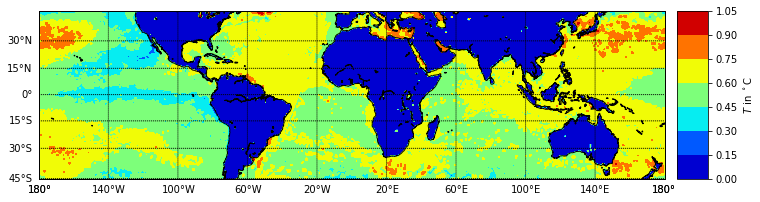

In [186]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import netCDF4

tmprt_vals = diff
tmprt_lat  = latitude[:]
tmprt_lon  = longitude[:]
# close dataset

###  Section added ################
# map lon values to 0. - 360. range

# tmprt_lon = (360 + tmprt_lon )%180
# rearange data
ind = np.argsort(tmprt_lon)
tmprt_lon = tmprt_lon[ind]
tmprt_vals = tmprt_vals[:, :, ind]

fig1, ax1 = plt.subplots(1,1, figsize=(12,8) )
# use the Miller projection
map1 = Basemap( projection='mill', resolution='l',\
               llcrnrlon=-180.,urcrnrlon=180.,\
               llcrnrlat=-45.0,urcrnrlat=45. )

# draw coastline, map-boundary
map1.drawcoastlines()
map1.drawmapboundary( fill_color='white' )

# draw grid 
map1.drawparallels( np.arange(-45.,45.,15.),  labels=[1,0,0,0] )
map1.drawmeridians( np.arange(-180.,180.,40.),labels=[0,0,0,1] )

# overplot temperature
## make the longitude and latitude grid projected onto map
tmprt_x, tmprt_y = map1(*np.meshgrid(tmprt_lon,tmprt_lat))

## make the contour plot
CS1 = map1.contourf( tmprt_x, tmprt_y, tmprt_vals[0], 
                     cmap=plt.cm.jet
                   )
cbar1 = map1.colorbar( CS1, location='right' )
cbar1.set_label( r'$T$ in $^\circ$C')

plt.savefig("sst_diff.png",dpi=300)

plt.show()

In [202]:
a, b = np.hsplit(tmprt_vals[0], [720])

In [209]:
diff_pacific_contre = np.concatenate([b, a], axis=1)

In [211]:
diff_pacific_contre.shape

(361, 1440)

In [216]:
type(diff_pacific_contre)

numpy.ndarray

In [218]:
import numpy.ma as ma

diff.view(ma.MaskedArray)

masked_array(
  data=[[[0.41087173, 0.4093127 , 0.41460034, ..., 0.44369103,
          0.43172825, 0.42198506],
         [0.38463876, 0.38386894, 0.39098311, ..., 0.42430881,
          0.41009987, 0.39635446],
         [0.3636587 , 0.36257545, 0.36960181, ..., 0.40493986,
          0.3899754 , 0.37598189],
         ...,
         [0.49269281, 0.49756185, 0.50247071, ..., 0.48541937,
          0.48640053, 0.48894583],
         [0.48915104, 0.49305117, 0.49617026, ..., 0.47820005,
          0.48115986, 0.4852652 ],
         [0.49819281, 0.50000403, 0.50313128, ..., 0.48231765,
          0.48960129, 0.49368418]]],
  mask=False,
  fill_value=1e+20)

In [219]:
diff_pacific_contre.view(ma.MaskedArray)

masked_array(
  data=[[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.36328094, 0.35981881, 0.35946759, ..., 0.37138954, 0.36773036,
         0.3665787 ],
        [0.35888972, 0.35343771, 0.34469917, ..., 0.36971922, 0.36660524,
         0.36292666],
        [0.36147075, 0.35668237, 0.34800509, ..., 0.36613764, 0.36666242,
         0.36299915]],
  mask=False,
  fill_value=1e+20)

MaskError: Mask and data not compatible: data size is 1440, mask size is 519840.

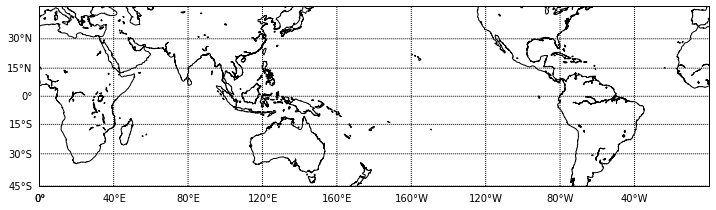

In [212]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import netCDF4

tmprt_vals = diff_pacific_contre
tmprt_lat  = latitude[:]
tmprt_lon  = longitude[:]
# close dataset

###  Section added ################
# map lon values to 0. - 360. range

# tmprt_lon = (360 + tmprt_lon )%180
# rearange data
ind = np.argsort(tmprt_lon)
tmprt_lon = tmprt_lon[ind]
# tmprt_vals = tmprt_vals[:, :, ind]

fig1, ax1 = plt.subplots(1,1, figsize=(12,8) )
# use the Miller projection
map1 = Basemap( projection='mill', resolution='l',\
               llcrnrlon=0.,urcrnrlon=360.,\
               llcrnrlat=-45.0,urcrnrlat=45. )

# draw coastline, map-boundary
map1.drawcoastlines()
map1.drawmapboundary( fill_color='white' )

# draw grid 
map1.drawparallels( np.arange(-45.,45.,15.),  labels=[1,0,0,0] )
map1.drawmeridians( np.arange(0.,360.,40.),labels=[0,0,0,1] )

# overplot temperature
## make the longitude and latitude grid projected onto map
tmprt_x, tmprt_y = map1(*np.meshgrid(tmprt_lon,tmprt_lat))

## make the contour plot
CS1 = map1.contourf( tmprt_x, tmprt_y, tmprt_vals[0], 
                     cmap=plt.cm.jet
                   )
cbar1 = map1.colorbar( CS1, location='right' )
cbar1.set_label( r'$T$ in $^\circ$C')

plt.savefig("sst_diff.png",dpi=300)

plt.show()


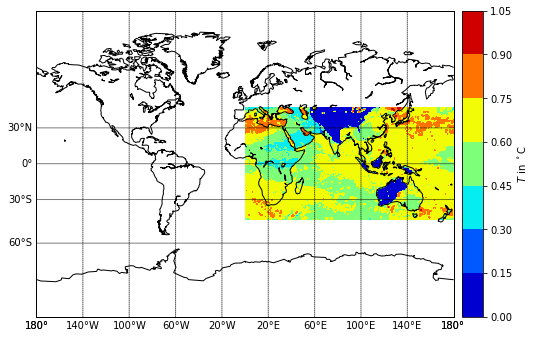

In [149]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import netCDF4

tmprt_vals = diff
tmprt_lat  = latitude[:]
tmprt_lon  = longitude[:]
# close dataset

###  Section added ################
# map lon values to -180..180 range
# f = lambda x: ((x+180) % 360) - 180
tmprt_lon = (360 + tmprt_lon )%180
# rearange data
ind = np.argsort(tmprt_lon)
tmprt_lon = tmprt_lon[ind]
tmprt_vals = tmprt_vals[:, :, ind]

##################################


fig1, ax1 = plt.subplots(1,1, figsize=(8,6) )
# use the Miller projection
map1 = Basemap( projection='mill', lat_ts=10, \
               llcrnrlon= 0, urcrnrlon=360,\
#                llcrnrlat= tmprt_lat.min(), urcrnrlat=tmprt_lat.max(),\
               resolution='c')

# draw coastline, map-boundary
map1.drawcoastlines()
map1.drawmapboundary( fill_color='white' )

# draw grid 
map1.drawparallels( np.arange(-60.,60.,30.),  labels=[1,0,0,0] )
map1.drawmeridians( np.arange(-180.,180.,40.),labels=[0,0,0,1] )

# overplot temperature
## make the longitude and latitude grid projected onto map
tmprt_x, tmprt_y = map1(*np.meshgrid(tmprt_lon,tmprt_lat))

## make the contour plot
CS1 = map1.contourf( tmprt_x, tmprt_y, tmprt_vals[0,:,:], 
                     cmap=plt.cm.jet
                   )
cbar1 = map1.colorbar( CS1, location='right' )
cbar1.set_label( r'$T$ in $^\circ$C')

plt.savefig("sst_diff.png",dpi=300)

plt.show()

ValueError: too many values to unpack (expected 2)

<Figure size 432x288 with 0 Axes>

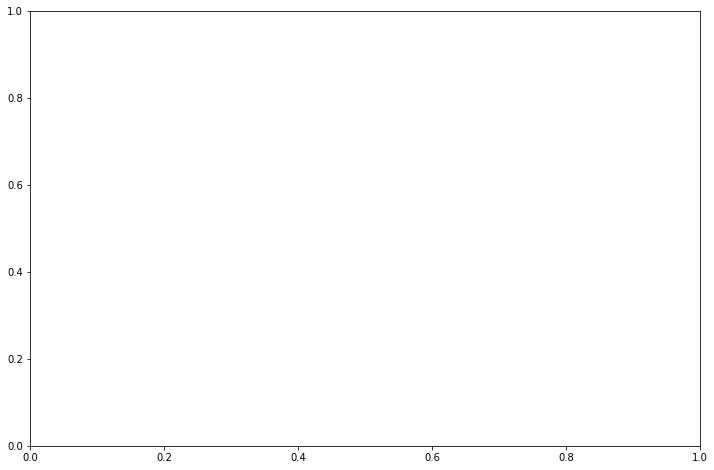

In [155]:
import netCDF4

# set up the figure
plt.figure()

# set up the URL to access the data server.
# See the NWW3 directory on NOMADS 
# for the list of available model run dates.

lat  = latitude[:].data
lon  = longitude[:].data
data = diff


# Since Python is object oriented, you can explore the contents of the NOMADS
# data set by examining the file object, such as file.variables.

# The indexing into the data set used by netCDF4 is standard python indexing.
# In this case we want the first forecast step, but note that the first time 
# step in the RTOFS OpenDAP link is all NaN values.  So we start with the 
# second timestep

# Plot the field using Basemap.  Start with setting the map
# projection using the limits of the lat/lon data itself:
fig=plt.figure(figsize=(12, 8) )

# Miller projection:
m=Basemap(projection='mill',lat_ts=10,\
#           llcrnrlon=lon.min(), urcrnrlon=lon.max(),\
#           llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
  resolution='c')


# convert the lat/lon values to x/y projections.

x, y = m(*np.meshgrid(lon,lat))

# plot the field using the fast pcolormesh routine 
# set the colormap to jet.

m.pcolormesh(x,y,data,cmap=plt.cm.jet)
m.colorbar(location='right')

# Add a coastline and axis values.

m.drawcoastlines()
m.fillcontinents()
m.drawmapboundary()
m.drawparallels(np.arange(-90.,90.,30.),labels=[1,0,0,0])
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0,0,0,1])

# Add a colorbar and title, and then show the plot.

plt.title('Figure');

In [169]:
lon[:50]

array([-180.  , -179.75, -179.5 , -179.25, -179.  , -178.75, -178.5 ,
       -178.25, -178.  , -177.75, -177.5 , -177.25, -177.  , -176.75,
       -176.5 , -176.25, -176.  , -175.75, -175.5 , -175.25, -175.  ,
       -174.75, -174.5 , -174.25, -174.  , -173.75, -173.5 , -173.25,
       -173.  , -172.75, -172.5 , -172.25, -172.  , -171.75, -171.5 ,
       -171.25, -171.  , -170.75, -170.5 , -170.25, -170.  , -169.75,
       -169.5 , -169.25, -169.  , -168.75, -168.5 , -168.25, -168.  ,
       -167.75], dtype=float32)